In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumour-traintestval/archiv/Val/Pituitary/images/Tr-pi_0532.jpg
/kaggle/input/brain-tumour-traintestval/archiv/Val/Pituitary/images/Tr-pi_0972.jpg
/kaggle/input/brain-tumour-traintestval/archiv/Val/Pituitary/images/Tr-pi_0818.jpg
/kaggle/input/brain-tumour-traintestval/archiv/Val/Pituitary/images/Tr-pi_0605.jpg
/kaggle/input/brain-tumour-traintestval/archiv/Val/Pituitary/images/Tr-pi_0339.jpg
/kaggle/input/brain-tumour-traintestval/archiv/Val/Pituitary/images/p (723).jpg
/kaggle/input/brain-tumour-traintestval/archiv/Val/Pituitary/images/Tr-pi_1200.jpg
/kaggle/input/brain-tumour-traintestval/archiv/Val/Pituitary/images/Tr-pi_0588.jpg
/kaggle/input/brain-tumour-traintestval/archiv/Val/Pituitary/images/Tr-pi_0935.jpg
/kaggle/input/brain-tumour-traintestval/archiv/Val/Pituitary/images/Tr-pi_1202.jpg
/kaggle/input/brain-tumour-traintestval/archiv/Val/Pituitary/images/Tr-pi_1276.jpg
/kaggle/input/brain-tumour-traintestval/archiv/Val/Pituitary/images/Tr-pi_0194.jpg
/kaggle

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [3]:
train_dir = '/kaggle/input/brain-tumour-traintestval/archiv/Train'
val_dir = '/kaggle/input/brain-tumour-traintestval/archiv/Val'
test_dir = '/kaggle/input/brain-tumour-traintestval/archiv/Test'

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 4337 images belonging to 4 classes.
Found 512 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [5]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Build the base model with random initialization
base_model = InceptionV3(weights=None, include_top=False, input_shape=(299, 299, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)  # 4 classes: Glioma, Meningioma, Pituitary, No Tumor

model = Model(inputs=base_model.input, outputs=predictions)


In [6]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])


In [7]:
class MyDataset(tf.keras.utils.Sequence):
    def __init__(self, *args, **kwargs):
        super().__init__(**kwargs)

In [8]:
history = model.fit(
    train_generator,  # Training data
    epochs=30,
    validation_data=val_generator  # Validation data
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


136/136 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - Precision: 0.6364 - Recall: 0.4393 - accuracy: 0.5629 - loss: 1.0106 - val_Precision: 0.2656 - val_Recall: 0.2656 - val_accuracy: 0.2656 - val_loss: 3.2718
Epoch 2/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 101s 707ms/step - Precision: 0.7884 - Recall: 0.7382 - accuracy: 0.7684 - loss: 0.5821 - val_Precision: 0.2686 - val_Recall: 0.2676 - val_accuracy: 0.2676 - val_loss: 3.0659
Epoch 3/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 100s 700ms/step - Precision: 0.8098 - Recall: 0.7703 - accuracy: 0.7914 - loss: 0.5276 - val_Precision: 0.1414 - val_Recall: 0.1367 - val_accuracy: 0.1484 - val_loss: 2.8054
Epoch 4/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 101s 703ms/step - Precision: 0.8563 - Recall: 0.8354 - accuracy: 0.8474 - loss: 0.3984 - val_Precision: 0.7395 - val_Recall: 0.6543 - val_accuracy: 0.6953 - val_loss: 0.8398
Epoch 5/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 100s 697ms/step - Precision: 0.8841 - Recall: 0.8656 - accuracy: 0.8761 - loss: 0.3471 - val_Precision: 0.8862 - val_R

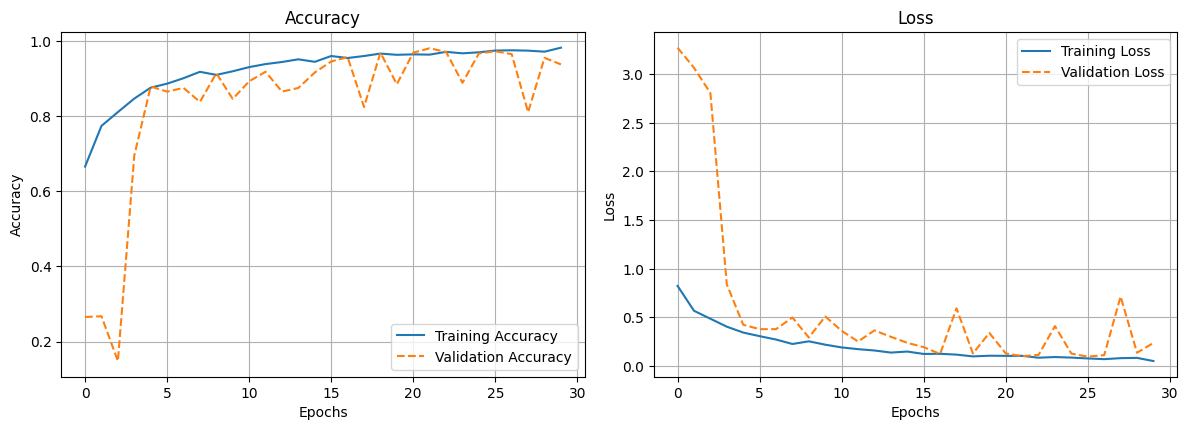

In [9]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Precision
if 'precision' in history.history:  # Ensure precision was calculated
    plt.subplot(2, 2, 3)
    plt.plot(history.history['precision'], label='Training Precision')
    plt.plot(history.history['val_precision'], label='Validation Precision', linestyle='--')
    plt.title('Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True)

# Plot Recall
if 'recall' in history.history:  # Ensure recall was calculated
    plt.subplot(2, 2, 4)
    plt.plot(history.history['recall'], label='Training Recall')
    plt.plot(history.history['val_recall'], label='Validation Recall', linestyle='--')
    plt.title('Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()
    plt.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [10]:
# Unfreeze some layers
for layer in model.layers[-100:]:  # Example: Unfreeze the last 100 layers
    layer.trainable = True

# Compile the model with a lower learning rate
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune
history_fine = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 200s 980ms/step - accuracy: 0.9866 - loss: 0.0348 - val_accuracy: 0.9824 - val_loss: 0.0848
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 100s 698ms/step - accuracy: 0.9902 - loss: 0.0285 - val_accuracy: 0.9844 - val_loss: 0.0652
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 99s 691ms/step - accuracy: 0.9949 - loss: 0.0131 - val_accuracy: 0.9863 - val_loss: 0.0663
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 100s 699ms/step - accuracy: 0.9972 - loss: 0.0120 - val_accuracy: 0.9902 - val_loss: 0.0602
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 100s 700ms/step - accuracy: 0.9914 - loss: 0.0216 - val_accuracy: 0.9902 - val_loss: 0.0610
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 141s 691ms/step - accuracy: 0.9972 - loss: 0.0102 - val_accuracy: 0.9883 - val_loss: 0.0729
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 100s 699ms/step - accuracy: 0.9948 - loss: 0.0152 - val_accuracy: 0.9902 - val_loss: 0.0640
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 100s 697ms/step - accuracy: 0.9957 - 

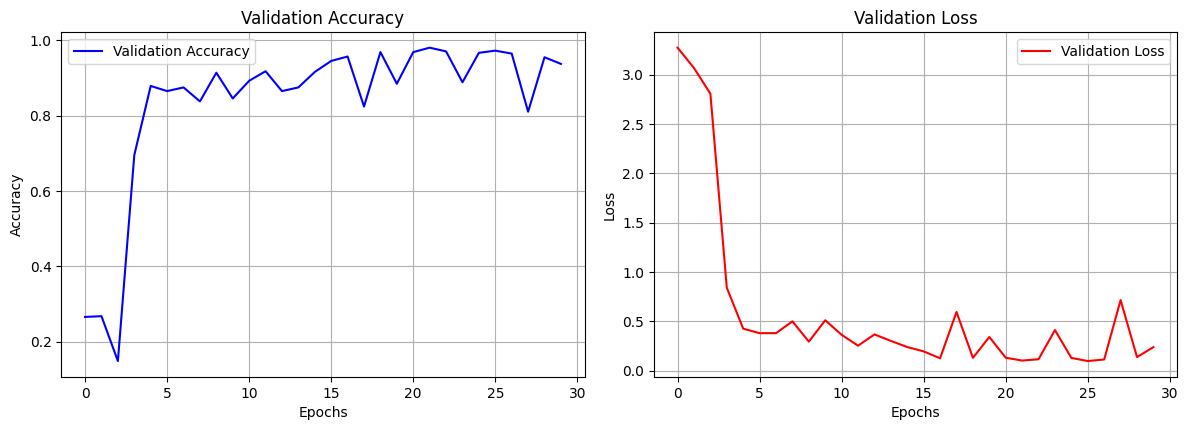

In [11]:
import matplotlib.pyplot as plt

# Plot Validation Accuracy
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Validation Loss
plt.subplot(2, 2, 2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Validation Precision
if 'val_precision' in history.history:  # Ensure precision was calculated
    plt.subplot(2, 2, 3)
    plt.plot(history.history['val_precision'], label='Validation Precision', color='green')
    plt.title('Validation Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True)

# Plot Validation Recall
if 'val_recall' in history.history:  # Ensure recall was calculated
    plt.subplot(2, 2, 4)
    plt.plot(history.history['val_recall'], label='Validation Recall', color='purple')
    plt.title('Validation Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()
    plt.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [12]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.2f}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9728 - loss: 0.0968 
Test Accuracy: 0.97


13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 608ms/step


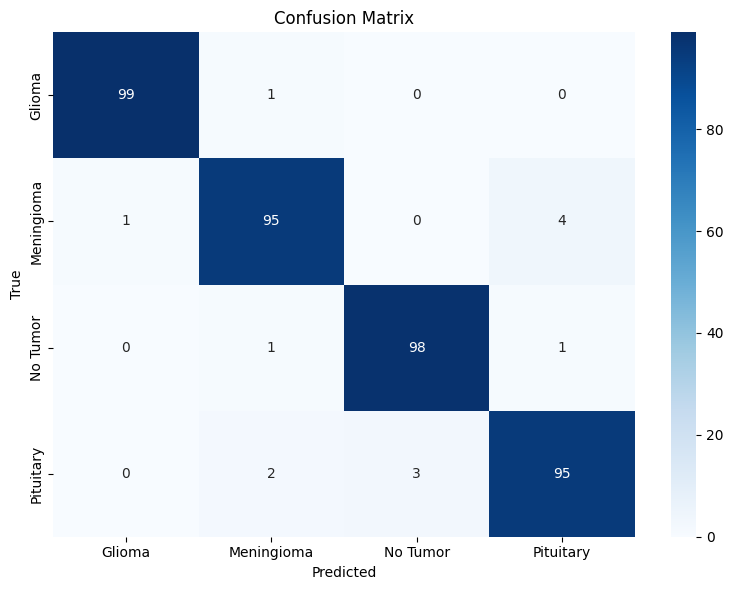

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Step 1: Get predictions from the model
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 2: Get true labels from the generator
y_true = test_generator.classes

# Step 3: Get class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Step 4: Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 5: Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [16]:
model.save('brain_tumor_inceptionv3new.h5')


Found 400 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 423ms/step - accuracy: 0.9728 - loss: 0.0968
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 532ms/step
Test Accuracy (Keras): 0.9675
Test Accuracy (Scikit-learn): 0.9675
Test Precision: 0.9675
Test Recall: 0.9675
Test Log Loss: 0.1457


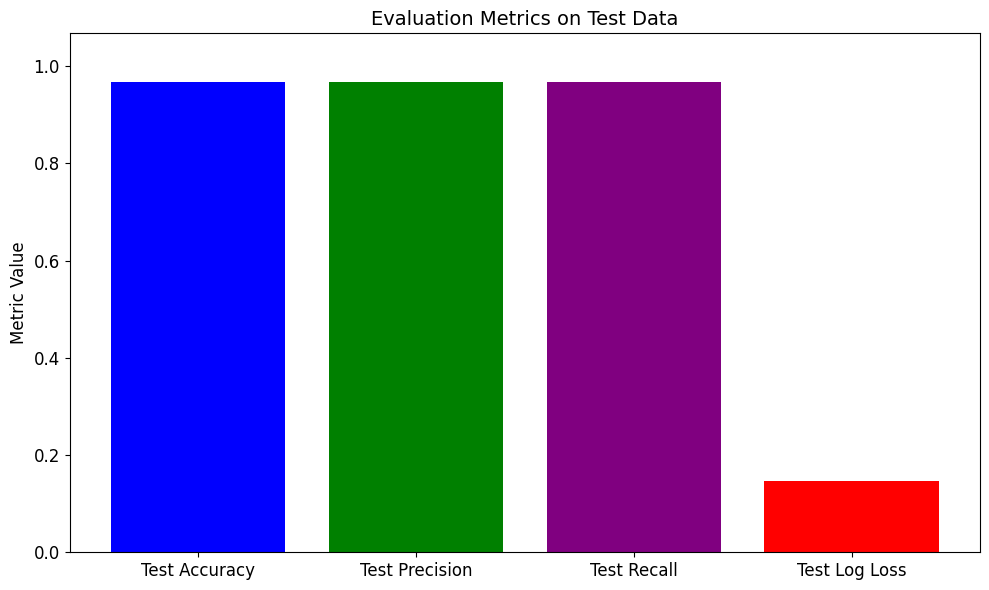

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, log_loss
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the saved model
model_path = "brain_tumor_inceptionv3new.h5"
model = load_model(model_path)

# Path to the test dataset
test_data_dir = "/kaggle/input/brain-tumour-traintestval/archiv/Test"

# ImageDataGenerator for testing
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(299, 299),  # Match input size of the model (InceptionV3 expects 299x299)
    batch_size=32,
    class_mode='categorical',  # Assuming multi-class classification
    shuffle=False
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)

# Get true labels and predictions
y_true = test_generator.classes  # Ground truth labels
y_pred = model.predict(test_generator)  # Predictions (probabilities)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=-1)

# Compute metrics
test_precision = precision_score(y_true, y_pred_classes, average='weighted')
test_recall = recall_score(y_true, y_pred_classes, average='weighted')
test_log_loss = log_loss(y_true, y_pred)
test_accuracy_score = accuracy_score(y_true, y_pred_classes)

# Debug the values
print(f"Test Accuracy (Keras): {test_accuracy:.4f}")
print(f"Test Accuracy (Scikit-learn): {test_accuracy_score:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test Log Loss: {test_log_loss:.4f}")

# Plot the metrics
metrics = ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test Log Loss']
values = [test_accuracy, test_precision, test_recall, test_log_loss]

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'purple', 'red']

# Bar plot for metrics
plt.bar(metrics, values, color=colors)
plt.title('Evaluation Metrics on Test Data', fontsize=14)
plt.ylabel('Metric Value', fontsize=12)
plt.ylim(0, max(values) + 0.1)  # Dynamically adjust y-axis based on values
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


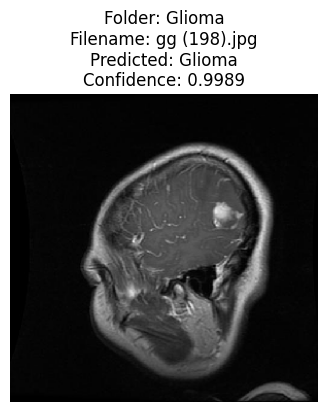

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


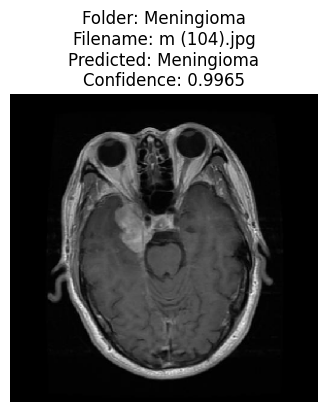

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


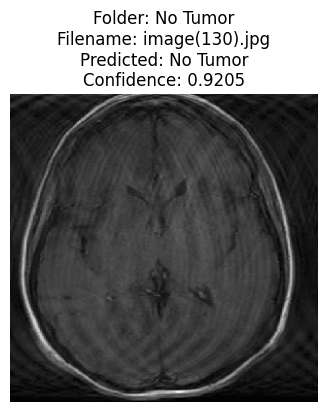

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


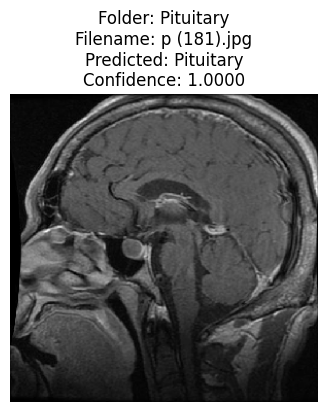

In [19]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Path to the saved model
model_path = "brain_tumor_inceptionv3new.h5"
model = load_model(model_path)

# Path to the test dataset
test_data_dir = "/kaggle/input/brain-tumour-traintestval/archiv/Test"

# Image size expected by the model
image_size = (299, 299)  # Match the input size of InceptionV3

# Categories in the test dataset
categories = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]

# Function to display the image and prediction
def display_and_predict_random_images(model, test_data_dir, categories, image_size):
    for category in categories:
        # Select a random image from the category folder
        category_path = os.path.join(test_data_dir, category, "images")
        image_files = [
            file for file in os.listdir(category_path)
            if file.endswith(('.png', '.jpg', '.jpeg'))
        ]
        random_image = random.choice(image_files)
        random_image_path = os.path.join(category_path, random_image)

        # Load and preprocess the image
        img = load_img(random_image_path, target_size=image_size)
        img_array = img_to_array(img) / 255.0  # Normalize the image
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Predict the category
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=-1)[0]

        # Mapping class indices to category names
        class_indices = {
            0: "Glioma",
            1: "Meningioma",
            2: "No Tumor",
            3: "Pituitary",
        }
        predicted_category = class_indices[predicted_class]

        # Display the image and results
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.axis("off")
        plt.title(
            f"Folder: {category}\nFilename: {random_image}\nPredicted: {predicted_category}\nConfidence: {predictions[0][predicted_class]:.4f}"
        )
        plt.show()

# Call the function
display_and_predict_random_images(model, test_data_dir, categories, image_size)


In [20]:
import numpy as np

# Predict on test data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Map class indices to labels
class_labels = list(test_generator.class_indices.keys())
print(class_labels)


13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 520ms/step
['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']


In [21]:
model.save('brain_tumor_inceptionv3newone.h5')